In [16]:
import numpy
from math import sin, cos, log, pi
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
# model parameters:
Ms= 50  # mass in kg
#Mp=interate#####
#Mp_dot=#########
g = 9.81 # gravity in S^{2}
p=1.091 # kg/(m^{3})
A = 0.25*pi # area in M^{2}  
V_e = 325  # velcoity in M/s
C_D = 0.15
m_po=100 # 100kg at t=0 in kilogram
### set initial conditions ###
H0 = 0 #start ar the ground
V0 = 0 #satrt at the ground
#----------------------------------------------------------------
def MpFun(totaltime):
    if totaltime<=5:
        rate=20.
        final=100.-totaltime*rate
    else:
        final=0.  
    return final
#----------------------------------------------------------------
def Mp_dotFun(totaltime):
    if totaltime<=5:
          rate=20.
    else:
          rate=0.
    return rate
#----------------------------------------------------------------
def f(u):
    #H=u[0]   
    V=u[1]
    return numpy.array([V,  
                        -g + (1./(Ms + Mp))*Mp_dot*V_e-\
                        0.5*(1./(Ms + Mp))*A*C_D*p*V*numpy.abs(V)])  

#----------------------------------------------------------------

def euler_step(u, f, dt):
  
    
    return u + dt * f(u)
#----------------------------------------------------------------
T = 100                         # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization
time=t
# initialize the array containing the solution for each time-step
u = numpy.empty((N, 2))
u[0] = numpy.array([H0, V0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    t1 = time[n]
    Mp = MpFun(t1)
    Mp_dot = Mp_dotFun(t1)
    u[n+1] = euler_step(u[n], f, dt)
#----------------------------------------------------------------
H = u[:,0]
V = u[:,1]

#print("H=",H)
#print("V=",V)

In [18]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    lesson1_1.py
	modified:   ../MAE6287/Untitled.ipynb
	modified:   ../lessons/01_phugoid/01_01_Phugoid_Theory.ipynb
	modified:   ../lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
	modified:   ../lessons/01_phugoid/01_03_PhugoidFullModel.ipynb
	modified:   ../lessons/01_phugoid/01_04_Second_Order_Methods.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Challenge1&2.ipynb
	Rocket1.ipynb
	Time test.ipynb
	Untitled.ipynb
	challenge3.1.ipynb
	challenge3.2.ipynb
	challenge3.ipynb
	challenge4.ipynb
	for loop test for challeng 3.ipynb
	homework one.ipynb
	learn_01_02_Phugoid_Oscillation.ipynb
	learn_01_03_PhugoidFullModel
	learn_01_03_PhugoidFullModel.ipynb
	learn_01_04_Second_Order_Methods.ipynb
	../MAE

In [15]:
1/50


0.02

377
H= [  0.00000000e+00   0.00000000e+00   3.35233333e-01 ...,  -5.42216311e+03
  -5.43089949e+03  -5.43963587e+03]
V= [  0.           3.35233333   6.76273724 ..., -87.36380757 -87.36380759
 -87.36380761]


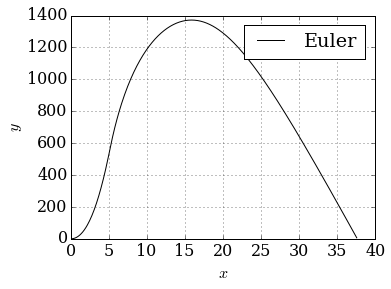

In [11]:
#----------------------------------------------------------------
# get the index of element of y where altitude becomes negative
idx_negative_euler = numpy.where(H<0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler = N-1
    print ('Euler integration has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
    
#--------------------------------------------------------------------------
# plot the glider path
pyplot.figure(figsize=(12,4))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(time[:idx_ground_euler], H[:idx_ground_euler], 'k-', label='Euler')

#pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

#--------------------------------------------------------------------------------------------------

print(idx_ground_euler)
print("H=",H)
print("V=",V)

In [12]:
import numpy
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)    
print(t[2])
b=max(V)
d=max(H)
print("MaxV=",b)
print("MaxH=",d)

0.2
MaxV= 237.200781611
MaxH= 1372.03511792


In [13]:
#c=V.index(max(V))
for n in range(N-1):
    if V[n] == b:
        print("step=",n)
        print("TimeForMaxV=",time[n])
        #print("H=",H[n])
    #else:
        #print("have not find")


step= 51
TimeForMaxV= 5.1


In [14]:
d=max(H)
print("MaxH=",d)
for n in range(N-1):
    if H[n]==d:
        print("step=",n)
        print("TimeForMaxH=",time[n])
        print("H=",H[n]) 
        print("V=",V[n])  
    

MaxH= 1372.03511792
step= 159
TimeForMaxH= 15.9
H= 1372.03511792
V= -0.600412997518


In [8]:
hint=V[idx_ground_euler-1]
print("The Velcoity to hit the ground=",hint)
for n in range(0,N-1,1):
    if V[n]==hint:        
        print("TimeForHinttheGround=",time[n])
       

The Velcoity to hit the ground= -86.1065777359
TimeForHinttheGround= 37.6


In [77]:
print(MpFun(3.2))


36.0
